In [447]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns

In [452]:
df = pd.read_csv('./data/final.csv')
df.shape
df = df.drop(columns = ['seats', 'years', 'zip', 'section', 'gender'])

In [436]:
df.columns

Index(['attendance', 'club_level', 'contact_id', 'distance', 'gender_num',
       'lower_level', 'multiple_sections', 'num_sections', 'num_years',
       'number_seats', 'ot_losses', 'paid_in_full', 'performance', 'renewed',
       'season_year', 'seat_end', 'seat_start', 'tenure', 'tix_num',
       'upper_level', 'wins', 'percent_total_used', 'flash_profit_loss'],
      dtype='object')

In [437]:
# df['wins_ot']=df['wins']*df['ot_losses']
# df['wins_years']=df['wins']*df['num_years']
# df['tenure_dist']=df['tenure']*df['distance']

In [438]:
df['distance'] = np.log(df['distance'])

In [439]:
df.isna().sum()

attendance            0
club_level            0
contact_id            0
distance              0
gender_num            0
lower_level           0
multiple_sections     0
num_sections          0
num_years             0
number_seats          0
ot_losses             0
paid_in_full          0
performance           0
renewed               0
season_year           0
seat_end              0
seat_start            0
tenure                0
tix_num               0
upper_level           0
wins                  0
percent_total_used    0
flash_profit_loss     0
dtype: int64

In [440]:
train = df[df['season_year'] !='2018-2019'].drop(columns = ['season_year'])
test = df[df['season_year'] == '2018-2019'].drop(columns = ['season_year'])

In [441]:
train['wins'].min()

22

In [442]:
test.shape

(6225, 22)

In [443]:
X_train = train.drop(columns = ['renewed'])
X_test = test.drop(columns = ['renewed'])
y_train = (np.log1p(train['renewed'])*100000000).astype(int)
y_test = (np.log1p(test['renewed'])*100000000).astype(int)

In [426]:
y_train.value_counts(normalize = True)

69314718    0.769252
0           0.230748
Name: renewed, dtype: float64

In [431]:
rf = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators':[20], 'max_depth':[4], 'max_features':[4]}
gs = GridSearchCV(rf, rf_params, cv = 5)
gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8238378462983252
{'max_depth': 4, 'max_features': 4, 'n_estimators': 20}


In [432]:
gs.score(X_test, y_test)

0.815582329317269

In [277]:
preds = gs.predict(X_test)

In [278]:
accuracy_score(y_test, preds)

0.8080321285140563

In [444]:
lr = LogisticRegressionCV()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)
# lr.score(X_test, y_test)

/Users/jeffwthomas/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.7692518390984504

In [445]:
lr.score(X_test, y_test)

0.9000803212851406

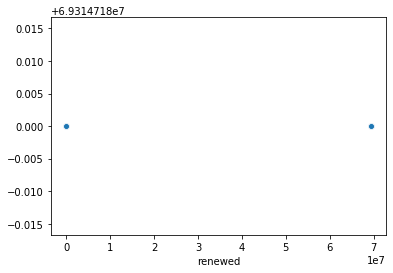

In [451]:
preds = lr.predict(X_test)

sns.scatterplot(y_test, preds)

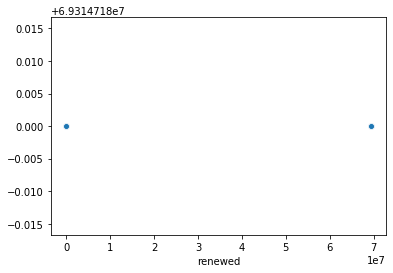

In [449]:
sns.scatterplot(y_test, preds)

In [222]:
X = df.drop(columns = ['renewed', 'season_year'])
y = df['renewed']

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [224]:
lr.fit(X_train, y_train)
lr.score(X_train, y_train)
lr.score(X_test, y_test)

/Users/jeffwthomas/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.7948653410521017

In [225]:
gs.fit(X_train,y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9812880218166562
{'max_depth': 12, 'max_features': 17, 'n_estimators': 11}


In [226]:
preds = gs.predict(X_test)

In [227]:
accuracy_score(y_test, preds)

0.9827586206896551